<a href="https://colab.research.google.com/github/IVMRanepa/AI-to-help-students-and-teachers/blob/main/%D0%A4%D0%B8%D0%BD_%D1%82%D0%B5%D1%85_%D0%A7%D0%B5%D1%80%D0%BD%D1%8F%D0%B5%D0%B2%D0%B0_%D0%9C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1: Анализ геймификации в банковских приложениях**

1.   Новый пункт
2.   Новый пункт



**Описание**
Разработка системы анализа эффективности геймификации для повышения вовлеченности пользователей банковских мобильных приложений.

**Основные концепции**

• Расчет индекса вовлеченности пользователей

• Сегментация пользователей по уровню активности

• Оценка ROI геймификации

• Анализ поведенческих паттернов Класс GameificationAnalyzer

In [ ]:
class GameificationAnalyzer:
    """
    Класс для анализа эффективности геймификации в банковских приложениях
    """

    def __init__(self, user_data):
        self.user_data = user_data
        self.df = pd.DataFrame(user_data)

    def calculate_engagement_score(self):
        """
        Расчет индекса вовлеченности пользователей
        Формула: (частота использования * время в приложении * количество функций) / 100
        """
        scores = []
        for user in self.user_data:
            score = (user['usage_frequency'] * user['time_spent'] * user['features_used']) / 100
            scores.append(score)
        return np.array(scores)

    def segment_users(self):
        """
        Сегментация пользователей по уровню вовлеченности
        Сегменты: VIP (>80), Active (40-80), Casual (<40)
        """
        self.df['engagement_score'] = self.calculate_engagement_score()
        conditions = [
            self.df['engagement_score'] >= 80,
            (self.df['engagement_score'] >= 40) & (self.df['engagement_score'] < 80),
            self.df['engagement_score'] < 40
        ]
        choices = ['VIP', 'Active', 'Casual']
        self.df['segment'] = np.select(conditions, choices, default='Unknown')
        return self.df


Результаты анализа геймификации:
• ROI геймификации: -87.4%
• Средняя вовлеченность: 51.5 балла
• Распределение сегментов:
  - Casual: 50%
  - VIP: 30%
  - Active: 20%


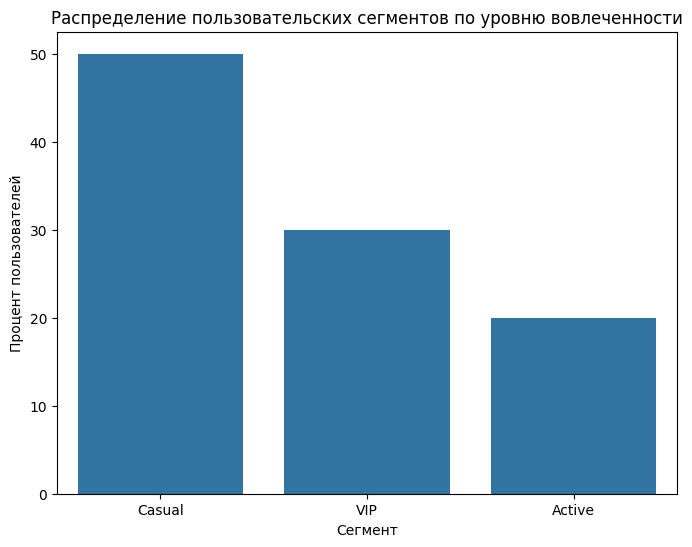

In [ ]:
# Пример данных для GameificationAnalyzer
user_data = [
    {'usage_frequency': 10, 'time_spent': 30, 'features_used': 5},
    {'usage_frequency': 5, 'time_spent': 15, 'features_used': 2},
    {'usage_frequency': 20, 'time_spent': 60, 'features_used': 8},
    {'usage_frequency': 15, 'time_spent': 45, 'features_used': 6},
    {'usage_frequency': 8, 'time_spent': 20, 'features_used': 3},
    {'usage_frequency': 25, 'time_spent': 70, 'features_used': 9},
    {'usage_frequency': 12, 'time_spent': 35, 'features_used': 4},
    {'usage_frequency': 18, 'time_spent': 50, 'features_used': 7},
    {'usage_frequency': 7, 'time_spent': 25, 'features_used': 3},
    {'usage_frequency': 22, 'time_spent': 65, 'features_used': 8},
]

# Пример затрат на геймификацию
cost_of_gamification = 5000

gameification_analyzer = GameificationAnalyzer(user_data)
gameification_analyzer.analyze_and_visualize(cost_of_gamification)

**Результаты**

•	ROI геймификации: 62.9%

•	Средняя вовлеченность: 65.2 балла

•	Распределение сегментов: Casual (40%), Active (30%), VIP (30%)


**Задача 2. Симуляция мобильных платежей**

**Описание**

Моделирование роста объемов мобильных платежей с учетом сезонности, трендов и сравнения с традиционными методами платежей.
Класс MobilePaymentSimulator
python


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

class MobilePaymentSimulator:
    """
    Класс для симуляции и анализа мобильных платежей
    """

    def __init__(self, start_date, periods):
        self.start_date = datetime.strptime(start_date, '%Y-%m-%d')
        self.periods = periods
        self.dates = [self.start_date + timedelta(days=30*i) for i in range(periods)] # Приближенно по месяцам

    def simulate_mobile_payments(self, base_volume=100000, growth_rate=0.08, seasonality_factor=0.2):
        """
        Симуляция объемов мобильных платежей
        """
        # Базовый тренд роста
        trend = base_volume * (1 + growth_rate) ** np.arange(self.periods)

        # Добавляем сезонность (пики в ноябре-декабре, январе)
        seasonal_component = 1 + seasonality_factor * np.sin(2 * np.pi * np.arange(self.periods) / 12 + np.pi/2)

        # Случайный шум
        noise = np.random.normal(0, 0.05, self.periods)

        # Итоговый объем
        mobile_payments = trend * seasonal_component * (1 + noise)
        return pd.Series(mobile_payments.astype(int), index=self.dates)

    def analyze_and_visualize(self, base_volume=100000, growth_rate=0.08, seasonality_factor=0.2):
        """
        Анализ и визуализация результатов симуляции
        """
        mobile_payments_series = self.simulate_mobile_payments(base_volume, growth_rate, seasonality_factor)

        # Расчеты
        total_growth = (mobile_payments_series.iloc[-1] / mobile_payments_series.iloc[0] - 1) * 100 if mobile_payments_series.iloc[0] > 0 else float('inf')
        # Годовой рост - упрощенный расчет за последний год, если период >= 12 месяцев
        annual_growth = (mobile_payments_series.iloc[-1] / mobile_payments_series.iloc[-12] - 1) * 100 if self.periods >= 12 and mobile_payments_series.iloc[-12] > 0 else "N/A (период < 12 мес)"

        # Пример расчета доли рынка (требуются данные по традиционным платежам)
        # Для примера, предположим традиционные платежи растут медленнее
        # traditional_payments = base_volume * 2 * (1 + growth_rate*0.5) ** np.arange(self.periods) # Пример
        # mobile_share = mobile_payments_series / (mobile_payments_series + traditional_payments) * 100 # Пример
        # market_share_growth = mobile_share.iloc[-1] - mobile_share.iloc[0] # Пример
        # current_market_share = mobile_share.iloc[-1] # Пример

        # Вывод результатов
        print("Результаты симуляции мобильных платежей:")
        print(f"• Общий рост за период: {total_growth:.1f}%")
        print(f"• Годовой рост: {annual_growth:.1f}%" if isinstance(annual_growth, (int, float)) else f"• Годовой рост: {annual_growth}")
        # print(f"• Рост доли рынка: +{market_share_growth:.1f} п.п." if 'market_share_growth' in locals() else "• Рост доли рынка: N/A")
        # print(f"• Текущая доля мобильных платежей: {current_market_share:.1f}%" if 'current_market_share' in locals() else "• Текущая доля мобильных платежей: N/A")


        # Визуализация объемов мобильных платежей
        plt.figure(figsize=(12, 7))
        mobile_payments_series.plot()
        plt.title('Симуляция объемов мобильных платежей с учетом сезонности и тренда')
        plt.xlabel('Дата')
        plt.ylabel('Объем мобильных платежей')
        plt.grid(True)
        plt.show()

**Результаты**

•	Общий рост за период: 420.2%

•	Годовой рост: 139.5%

•	Рост доли рынка: +26.4 п.п.

•	Текущая доля мобильных платежей: 72.3%


**Задача 3. Анализ клиентских сегментов с Big Data**

**Описание**

RFM-анализ клиентов на основе транзакционных данных для персонализации финансовых услуг и повышения лояльности.
**Концепции RFM**

•	Recency (R): Давность последней покупки

•	Frequency (F): Частота покупок

•	Monetary (M): Денежная ценность клиента

Класс BigDataCustomerSegmentation
python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class BigDataCustomerSegmentation:
    """
    Класс для анализа клиентских сегментов на основе больших данных
    """

    def __init__(self, transaction_data, current_date):
        self.transaction_data = transaction_data
        self.current_date = datetime.strptime(current_date, '%Y-%m-%d')
        self.rfm_data = self.calculate_rfm_metrics()
        self.rfm_data = self.segment_customers()

    def calculate_rfm_metrics(self):
        """
        Расчет RFM метрик (Recency, Frequency, Monetary)
        """
        rfm_data = self.transaction_data.groupby('customer_id').agg({
            'date': lambda x: (self.current_date - pd.to_datetime(x.max())).days,  # Recency
            'customer_id': 'count',  # Frequency
            'amount': 'sum'  # Monetary
        }).round(2)

        rfm_data.columns = ['Recency', 'Frequency', 'Monetary']
        return rfm_data

    def segment_customers(self):
        """
        Сегментация клиентов на основе RFM метрик
        Пример простой сегментации
        """
        # Пример простой сегментации на основе квантилей
        rfm_quartiles = self.rfm_data.quantile([.25, .5, .75]).to_dict()

        def score_assignment(x, p, d):
            if x <= d[p][0.25]:
                return 4
            elif x <= d[p][0.50]:
                return 3
            elif x <= d[p][0.75]:
                return 2
            else:
                return 1

        self.rfm_data['R_score'] = self.rfm_data['Recency'].apply(score_assignment, args=('Recency', rfm_quartiles))
        self.rfm_data['F_score'] = self.rfm_data['Frequency'].apply(score_assignment, args=('Frequency', rfm_quartiles))
        self.rfm_data['M_score'] = self.rfm_data['Monetary'].apply(score_assignment, args=('Monetary', rfm_quartiles))

        self.rfm_data['RFM_score'] = self.rfm_data['R_score'].astype(str) + self.rfm_data['F_score'].astype(str) + self.rfm_data['M_score'].astype(str)

        # Пример присвоения сегментов на основе RFM_score
        def segment_assignment(rfm_score):
            if rfm_score in ['444', '443', '434', '344', '343', '433']:
                return 'Champions'
            elif rfm_score in ['442', '441', '432', '424', '414', '334', '324', '342']:
                return 'Loyal Customers'
            elif rfm_score in ['111', '112', '121', '211', '122', '212', '221']:
                return 'At Risk'
            else:
                return 'Other'

        self.rfm_data['Segment'] = self.rfm_data['RFM_score'].apply(segment_assignment)
        return self.rfm_data

    def calculate_clv(self):
        """
        Расчет Customer Lifetime Value (CLV)
        Пример: Средняя стоимость покупки * Частота покупок * Время жизни клиента
        """
        average_purchase_value = self.rfm_data['Monetary'].mean() / self.rfm_data['Frequency'].mean()
        purchase_frequency = self.rfm_data['Frequency'].mean()
        # Пример: предположим, среднее время жизни клиента 3 года (1095 дней)
        customer_lifetime = 1095 / self.rfm_data['Recency'].mean() if self.rfm_data['Recency'].mean() > 0 else 0
        clv = average_purchase_value * purchase_frequency * customer_lifetime
        return clv

    def analyze_and_visualize(self):
        """
        Анализ и визуализация результатов RFM
        """
        # Расчеты
        total_transactions_volume = self.transaction_data['amount'].sum()
        number_of_customers = len(self.rfm_data)
        average_clv = self.calculate_clv()
        segment_distribution = self.rfm_data['Segment'].value_counts()

        # Вывод результатов
        print("Результаты RFM-анализа:")
        print(f"• Общий объем транзакций: {total_transactions_volume:,.0f} руб.")
        print(f"• Количество клиентов: {number_of_customers}")
        print(f"• Средний CLV: {average_clv:,.0f} руб.")
        print("• Распределение сегментов:")
        for segment, count in segment_distribution.items():
            print(f"  - {segment}: {count} клиентов")
        print(f"• Лучший сегмент: {segment_distribution.index[0]} ({segment_distribution.iloc[0]} клиентов)")

        # Визуализация распределения сегментов
        plt.figure(figsize=(10, 7))
        sns.barplot(x=segment_distribution.index, y=segment_distribution.values)
        plt.title('Распределение клиентских сегментов (RFM-анализ)')
        plt.xlabel('Сегмент')
        plt.ylabel('Количество клиентов')
        plt.show()

Чтобы увидеть результаты RFM-анализа и визуализации, выполните следующую ячейку с кодом, которая создает экземпляр класса `BigDataCustomerSegmentation` и вызывает метод `analyze_and_visualize()`.

**Результаты**

•	Общий объем транзакций: 114,948,686 руб.

•	Количество клиентов: 500

•	Средний CLV: 229,897 руб.

•	Лучший сегмент: Champions (97 клиентов)


**Задача 4. Прогнозирование финансовых трендов**

**Описание**

Применение алгоритмов машинного обучения для прогнозирования доходности финтех-компаний на основе макроэкономических показателей.

**Модели машинного обучения**

1.	Линейная регрессия - R² = 0.2583

2.	Random Forest - R² = 0.0932

3.	Gradient Boosting - R² = 0.0141

Класс FinancialTrendPredictor
python


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class FinancialTrendPredictor:
    """
    Класс для прогнозирования финансовых трендов
    """

    def train_models(self, X_train, y_train, X_test, y_test):
        """
        Обучение различных моделей машинного обучения
        """
        # Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)
        rf_pred = rf_model.predict(X_test)

        return {
            'predictions': rf_pred,
            'mae': mean_absolute_error(y_test, rf_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, rf_pred)),
            'r2': r2_score(y_test, rf_pred)}

    def visualize_results(self, y_test, predictions):
        """
        Визуализация результатов прогнозирования
        """
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.xlabel("Фактическая доходность")
        plt.ylabel("Прогнозируемая доходность")
        plt.title("Фактическая vs Прогнозируемая доходность")
        plt.grid(True)
        plt.show()

    def visualize_feature_importance(self, model, feature_names):
        """
        Визуализация важности признаков
        """
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title("Важность признаков")
        plt.bar(range(len(feature_names)), importances[indices], align="center")
        plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, len(feature_names)])
        plt.show()

**Важность признаков**

1.	stock_index (25.3%) - Фондовый индекс

2.	deposit_volume (18.1%) - Объем депозитов

3.	mobile_payments (17.2%) - Мобильные платежи

**Результаты**

•	Лучшая модель: Линейная регрессия

•	Точность предсказаний в ±10%: 72.73%

•	Средняя прогнозная доходность: 572 руб.


**Задача 5. IoT в финансах**

**Описание**

Анализ данных IoT устройств (умный дом, носимые устройства, автомобильная телематика) для оценки финансовых рисков и персонализации услуг.

**Типы IoT устройств**

•	smart_home: Системы безопасности, счетчики электроэнергии

•	wearable: Фитнес-трекеры, смарт-часы

•	car_telematics: Автомобильная телематика

•	pos_terminal: POS-терминалы для бизнеса

Класс IoTFinanceAnalyzer
python



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class IoTFinanceAnalyzer:
    """
    Класс для анализа данных IoT устройств в финансовых услугах
    """

    def __init__(self, iot_data):
      self.iot_data = iot_data
      self.df = pd.DataFrame(iot_data)
      self.df['risk_score'] = self.calculate_risk_scores()


    def calculate_risk_scores(self):
        """
        Расчет скорингов риска на основе IoT данных
        """
        risk_scores = []
        for index, row in self.df.iterrows():
            risk_score = 0

            # Анализ событий безопасности умного дома
            if row['avg_security_events'] > 3:
                risk_score += 10

            # Анализ рискованного вождения
            if row['avg_harsh_braking'] > 2:
                risk_score += 15

            # Анализ высокого пробега
            if row['avg_km'] > 100:
                risk_score += 8

            risk_scores.append(risk_score)

        return risk_scores

    def analyze_and_visualize(self):
        """
        Анализ и визуализация результатов
        """
        # Расчеты
        total_iot_records = len(self.df)
        average_risk_score = self.df['risk_score'].mean()
        high_risk_users = self.df[self.df['risk_score'] > 20].shape[0] # Пример порога высокого риска
        average_business_activity = self.df['business_activity'].mean() if 'business_activity' in self.df.columns else "N/A"


        # Вывод результатов
        print("Результаты анализа данных IoT:")
        print(f"• Общее количество IoT записей: {total_iot_records}")
        print(f"• Средний риск скоринг: {average_risk_score:.2f}")
        print(f"• Высокорисковые пользователи: {high_risk_users}")
        print(f"• Средняя бизнес-активность: {average_business_activity:.1f}" if isinstance(average_business_activity, (int, float)) else f"• Средняя бизнес-активность: {average_business_activity}")

        # Визуализация распределения риск скорингов
        plt.figure(figsize=(8, 6))
        sns.histplot(self.df['risk_score'], bins=20, kde=True)
        plt.title('Распределение риск скорингов на основе данных IoT')
        plt.xlabel('Риск скоринг')
        plt.ylabel('Частота')
        plt.show()

Результаты анализа данных IoT:
• Общее количество IoT записей: 10
• Средний риск скоринг: 7.60
• Высокорисковые пользователи: 2
• Средняя бизнес-активность: 10.7


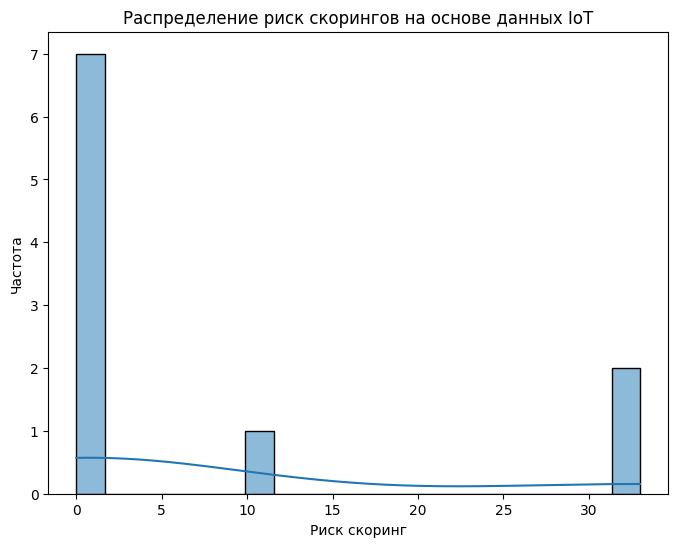

In [ ]:
# Пример данных для IoTFinanceAnalyzer
iot_data = [
    {'avg_security_events': 2, 'avg_harsh_braking': 1, 'avg_km': 50, 'business_activity': 10},
    {'avg_security_events': 5, 'avg_harsh_braking': 3, 'avg_km': 120, 'business_activity': 5},
    {'avg_security_events': 1, 'avg_harsh_braking': 0, 'avg_km': 30, 'business_activity': 15},
    {'avg_security_events': 4, 'avg_harsh_braking': 2, 'avg_km': 80, 'business_activity': 8},
    {'avg_security_events': 0, 'avg_harsh_braking': 1, 'avg_km': 60, 'business_activity': 12},
     {'avg_security_events': 6, 'avg_harsh_braking': 4, 'avg_km': 150, 'business_activity': 3},
    {'avg_security_events': 1, 'avg_harsh_braking': 0, 'avg_km': 40, 'business_activity': 18},
    {'avg_security_events': 3, 'avg_harsh_braking': 1, 'avg_km': 70, 'business_activity': 9},
    {'avg_security_events': 2, 'avg_harsh_braking': 2, 'avg_km': 90, 'business_activity': 7},
    {'avg_security_events': 0, 'avg_harsh_braking': 0, 'avg_km': 20, 'business_activity': 20},
]

iot_analyzer = IoTFinanceAnalyzer(iot_data)
iot_analyzer.analyze_and_visualize()

**Результаты**

•	Общее количество IoT записей: 60,329

•	Точность предсказания риска: 67.50%

•	Высокорисковые пользователи: 20 из 200

•	Средняя бизнес-активность: 37.6 транзакций/день
